# Softmax Classifier

Classify handwritten digits from the MNIST database by using Softmax classifier.


In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pylab as plt

%matplotlib inline
torch.manual_seed(0)

In [2]:
# Create the training dataset
train_dataset = datasets.MNIST(
    root="./data", train=True, download=True, transform=transforms.ToTensor()
)
print("Training dataset:\n ", train_dataset)

Training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [3]:
# Create validating dataset
validation_dataset = datasets.MNIST(
    root="./data", download=True, transform=transforms.ToTensor()
)
print("Validation dataset:\n ", validation_dataset)

Validation dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [5]:
def PlotParameters(model):
    W = model.state_dict()["linear.weight"].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:

            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap="seismic")

            ax.set_xticks([])
            ax.set_yticks([])

    plt.show()


def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap="gray")
    plt.title("y = " + str(data_sample[1]))

In [7]:
type(train_dataset[0][1])

int

Each element in the rectangular tensor corresponds to a number that represents a pixel intensity as demonstrated by the following image:

<img src="./assets/image_values.png" width="550" alt="MNIST elements">

In this image, the values are inverted i.e back represents weight.


In [9]:
train_dataset[3][1]  # Get the label of the fourth sample

1

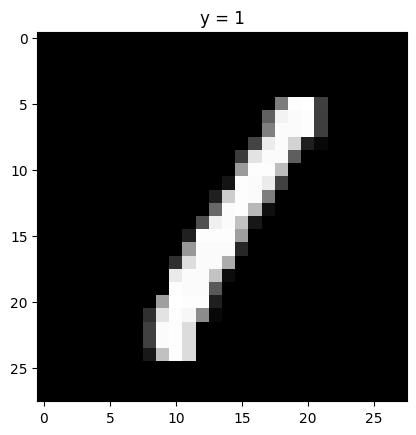

In [10]:
show_data(train_dataset[3])  # Display the fourth sample

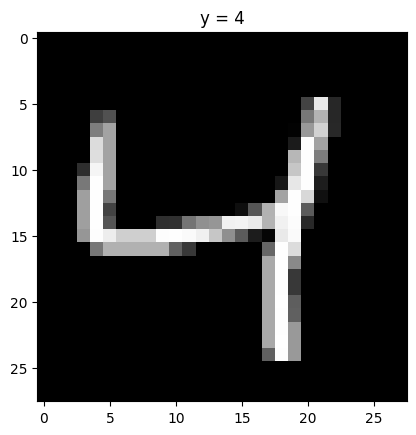

In [12]:
show_data(train_dataset[2])  # Display the third sample

In [13]:
class SoftMax(nn.Module):
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    # Prediction
    def forward(self, x):
        z = self.linear(x)
        return z

In [14]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

The Softmax function requires vector inputs. Note that the vector shape is 28x28.

Flatten the tensor as shown in this image:

<img src="./assets/image_to_vector.gif" width="550" alt="Flattened Image">

The size of the tensor is now 784.

<img src="./assets/imagetovector2.png" width="550" alt="Flattened Image">


In [15]:
# Set input size and output size
input_dim = 28 * 28
output_dim = 10

In [17]:
model = SoftMax(input_dim, output_dim)
model

SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [18]:
# Size of the model parameters
print("W: ", list(model.parameters())[0].size())
print("b: ", list(model.parameters())[1].size())

W:  torch.Size([10, 784])
b:  torch.Size([10])


We can cover the model parameters for each class to a rectangular grid:

<img src="./assets/paramaters_to_image.gif" width="550," align="center">


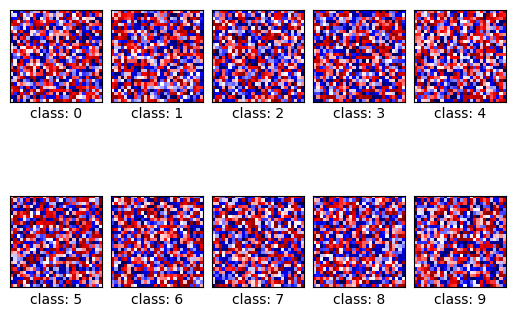

In [19]:
# Plot the model parameters for each class
PlotParameters(model)

In [20]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(
    dataset=validation_dataset, batch_size=5000
)

In [21]:
n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)


def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()

        correct = 0
        # perform a prediction on the validationdata
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 28 * 28))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)

In [22]:
train_model(n_epochs)

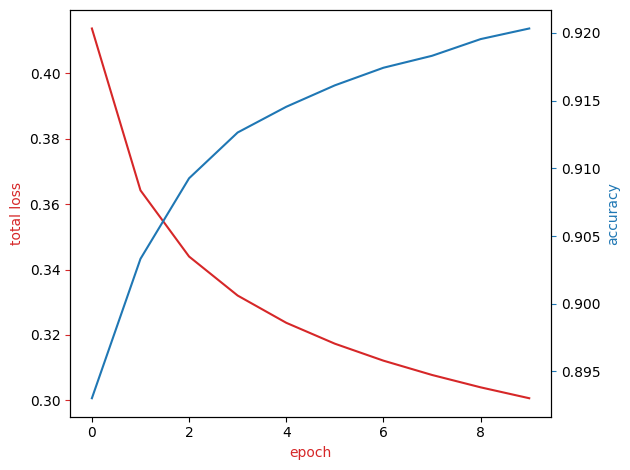

In [23]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = "tab:red"
ax1.plot(loss_list, color=color)
ax1.set_xlabel("epoch", color=color)
ax1.set_ylabel("total loss", color=color)
ax1.tick_params(axis="y", color=color)

ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel("accuracy", color=color)
ax2.plot(accuracy_list, color=color)
ax2.tick_params(axis="y", color=color)
fig.tight_layout()

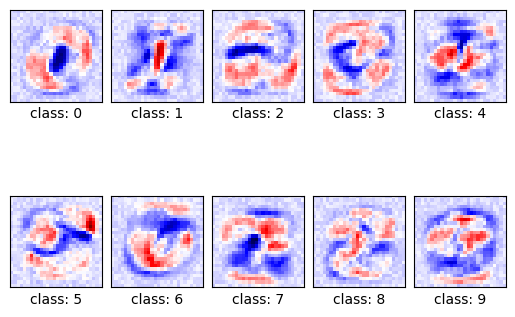

In [24]:
PlotParameters(model)

The results of the parameters for each class after the training looks like the corresponding numbers.


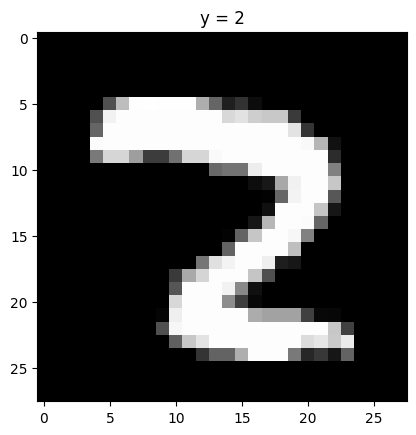

yhat: tensor([7])
probability of class  0.6734148263931274


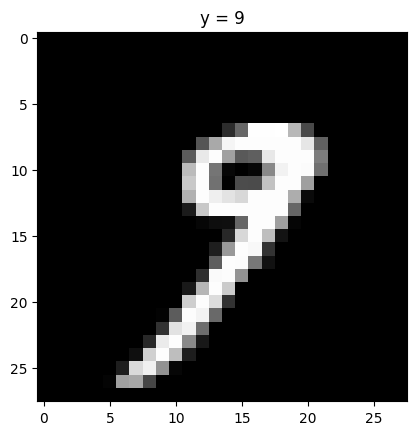

yhat: tensor([7])
probability of class  0.7062538862228394


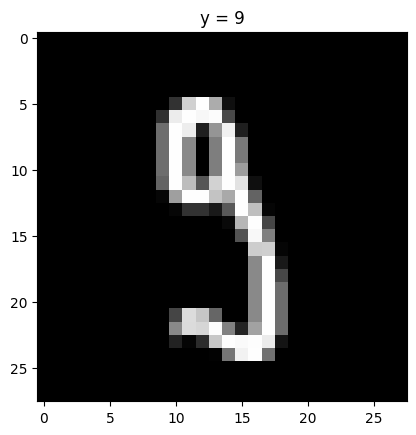

yhat: tensor([5])
probability of class  0.7309059500694275


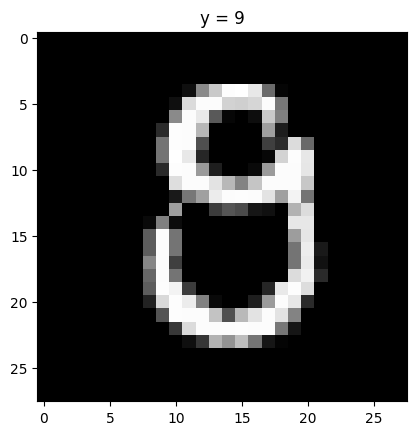

yhat: tensor([8])
probability of class  0.3839636743068695


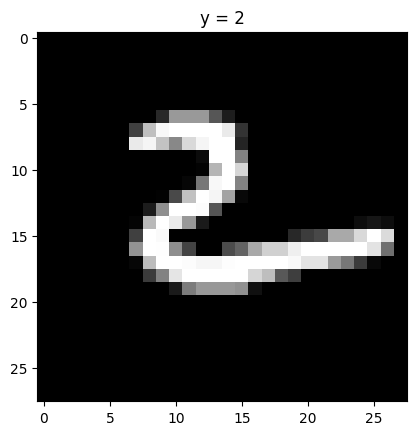

yhat: tensor([6])
probability of class  0.4991377592086792


In [25]:
# Plot the misclassified samples (first 5)
Softmax_fn = nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break

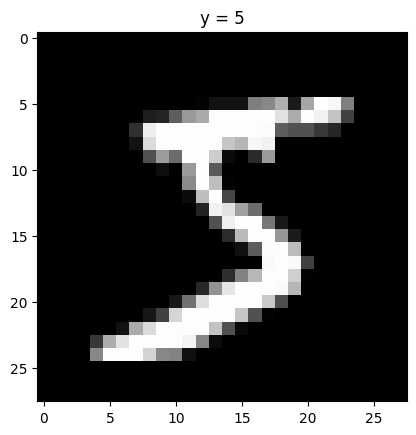

yhat: tensor([5])
probability of class  0.8502121567726135


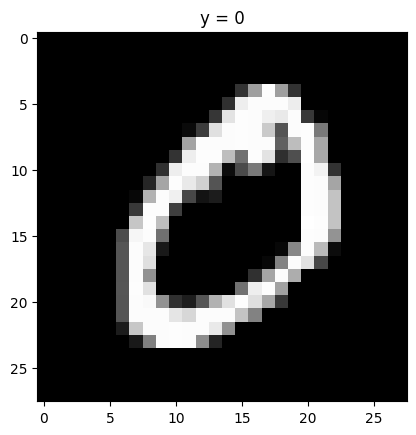

yhat: tensor([0])
probability of class  0.9997115731239319


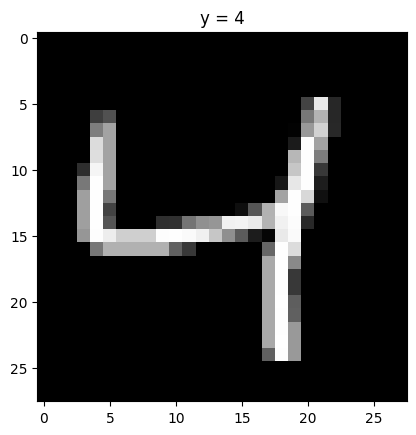

yhat: tensor([4])
probability of class  0.8598335981369019


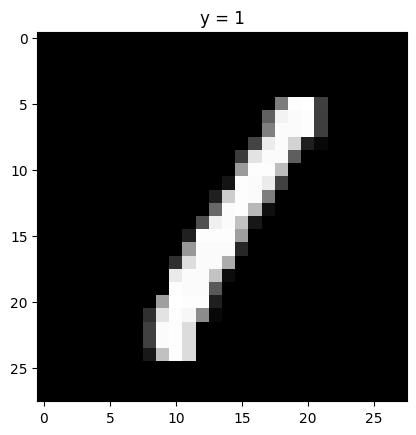

yhat: tensor([1])
probability of class  0.9636707305908203


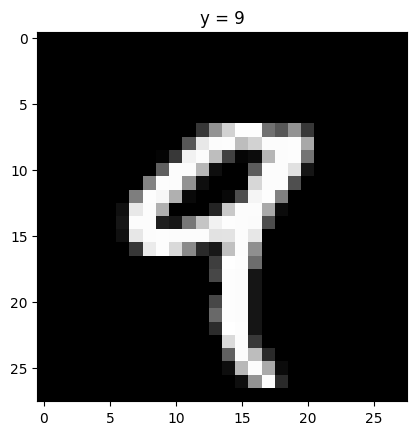

yhat: tensor([9])
probability of class  0.9249607920646667


In [26]:
# Plot the correctly classified samples (first 5)
Softmax_fn = nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break